# Project on Data Analysis and Mining


### Rúben Carvalho e Sofia Morgado

## 1. Define your Project

This project includes 4 chapters:

1. Problem definition, import necessary libraries and data

2. Regression Analysis

3. Principal Component Analysis

4. Fuzzy Clustering with Anomalous Patterns

The data set is available in the Kaggle website, and the data concerns various information about wine. 

### Import packages

In [ ]:
#To load files from your local disk
from google.colab import files
import io

#For data preparation and visualization
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv as inv
from numpy.linalg import det as det
from numpy import dot as dot

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm #for the qqplot
import scipy.stats as stats

from numpy.ma.core import mean, std

#Built in Regression
from sklearn.linear_model import LinearRegression

# Auxiliar libraries
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import dataset

In [ ]:
#Para fazer import dos dados para Pandas Dataframe, selecionar o documento que deve estar gravado com o nome winequality-red.xlsx do pc
data_frame = files.upload()

df = pd.read_excel(io.BytesIO(data_frame["winequality-red.xlsx"]))

Saving winequality-red.xlsx to winequality-red.xlsx


## 2. Regression Analysis

### a) Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐plot, and make a comment on it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e39a11fd0>,
      dtype=object)

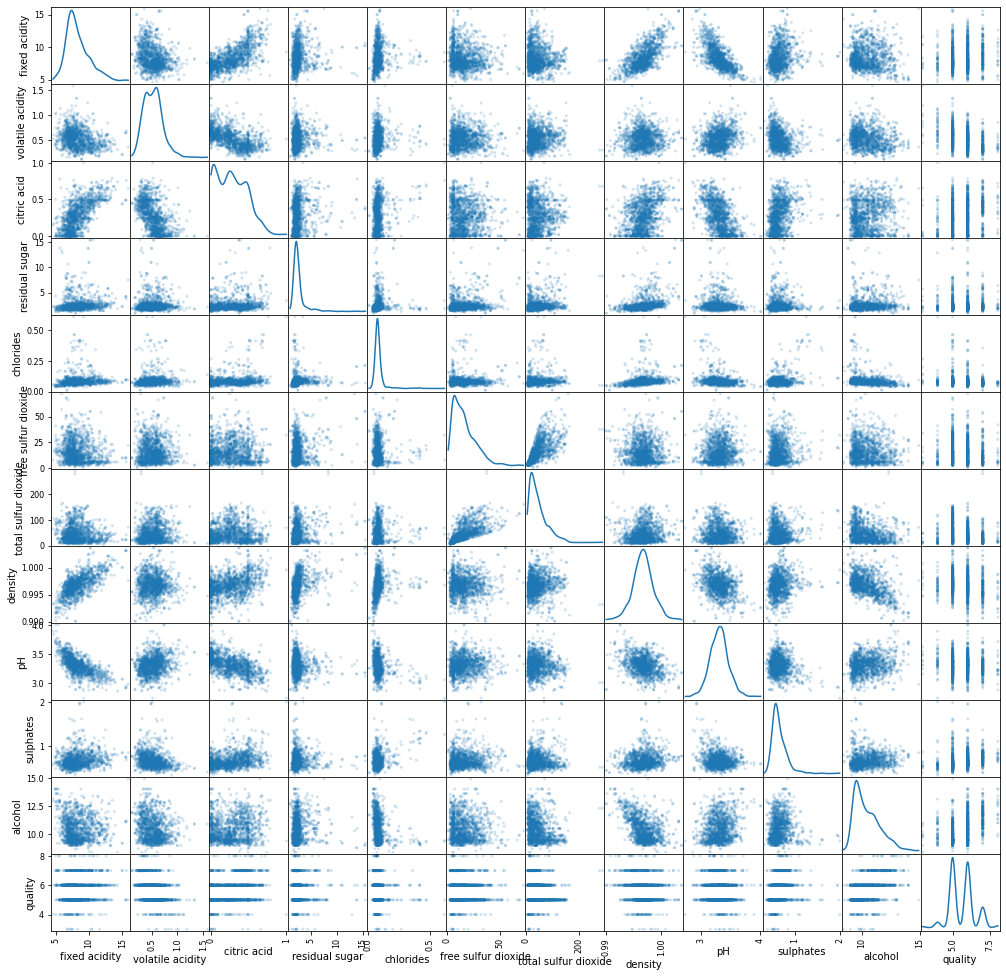

In [ ]:
#Realizar scatter plot de todas as features
scatter_plot = scatter_matrix(df, alpha=0.2, figsize=(17,17), diagonal='kde') #na diagonal colocamos o Kernel Density Estimation para vermos o aspeto da distribuição de cada variável
scatter_plot
#plt.suptitle("Scatter Plot Matrix Showing Relation Between All Features and KDE")
#plt.savefig('scatter_complete.png', dpi=300)

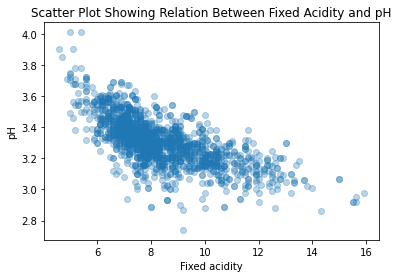

In [ ]:
#Selecionar 2 features: Selecionamos fixed acidity e pH
x = np.array(df["fixed acidity"])
y = np.array(df["pH"])

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.3})
ax.set(xlabel='Fixed acidity', ylabel='pH',title = "Scatter Plot Showing Relation Between Fixed Acidity and pH")
plt.savefig('scatter_ft.png', dpi=300)

###b) Build a linear regression of one of the features over the other. Obtain a normal probability plot of the standardized residuals from this regression. Does the normal probability plot indicate acceptable normality, or is there any skewness? If a skewness, what is the type of it?

### i. Perform a linear regression on the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


Estimated coefficients: [ 3.81495901 -0.06056103]


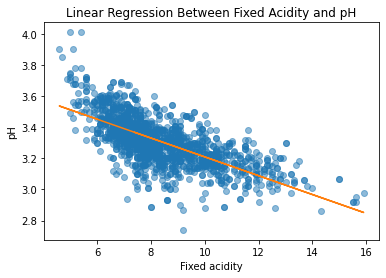

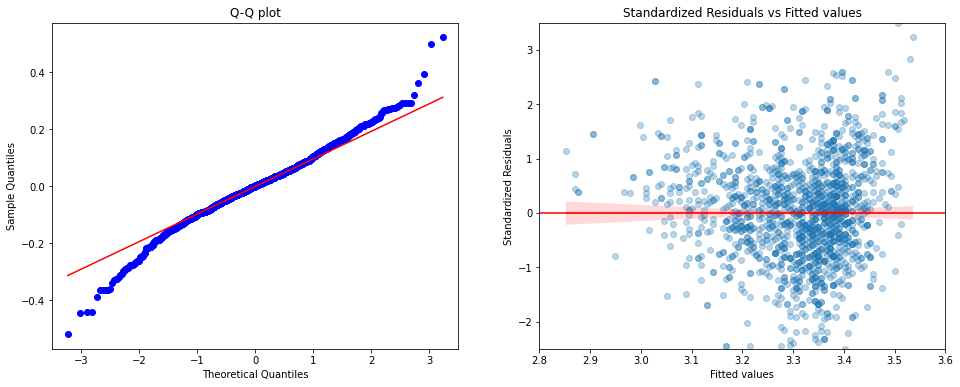

In [ ]:
#CALCULAR O COEFICIENTE DA REFRESSAO LINEAR
x = np.array(df["fixed acidity"])
y = np.array(df["pH"])

constant_term = np.ones(len(x))

# append constant term as a column of x
x = np.c_[constant_term, x]
#print(x[:5])

beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
#print('Old shape of coefficients array:',beta.shape)
beta = np.reshape(beta,(-1,1))
#print('New shape of coefficients array:',beta.shape)

# compute new predictions
predictions_with_intercept = dot(x,beta)

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Fixed acidity', ylabel='pH', title = "Linear Regression Between Fixed Acidity and pH")
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot
plt.savefig('lin_reg.png', dpi=300)



fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y - predictions_with_intercept[:,0]
degrees_of_freedom = len(y) - x.shape[1]

sm.qqplot(residuals,
          stats.t,
          distargs=(degrees_of_freedom,),
          line='q',
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x[:,1])
leverage = ( (1/len(x))
             + (((x[:,1] - mean_independent_variable)**2)
                / np.sum((x[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0],
            y=standardized_rediduals,
            ax=axs[1],
            lowess=False,
            scatter_kws={'alpha':0.3},
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-2.5,3.5)
axs[1].set_xlim(2.8,3.6)

axs[1].set(ylabel='Standardized Residuals',
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
plt.savefig('qq_plot.png', dpi=300)

### ii. Remove outliers concearning both variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1599


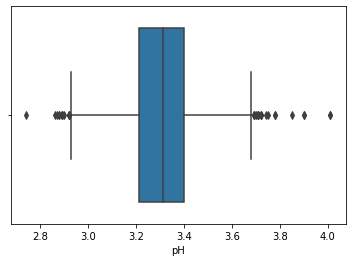

In [ ]:
sns.boxplot(df["pH"])
plt.savefig('boxplot_ph.png', dpi=300)
print(len(df["pH"]))

1599


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


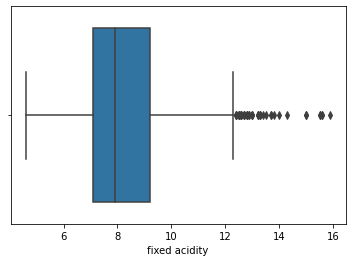

In [ ]:
print(len(df["fixed acidity"]))
sns.boxplot(df["fixed acidity"])
plt.savefig('boxplot_fixed_acidity.png', dpi=300)

In [ ]:
#REMOVER OUTLIERS

#Definir o primeiro e terceiro quantil
Q1 = df["fixed acidity"].quantile(0.25)
Q3 = df["fixed acidity"].quantile(0.75)

#IQR is interquantile range
IQR = Q3 - Q1

filter = (df["fixed acidity"]>= Q1 - 1.5 * IQR) & (df["fixed acidity"] <= Q3 + 1.5 *IQR)
df = df.loc[filter]


#Definir o primeiro e terceiro quantil
Q1 = df["pH"].quantile(0.25)
Q3 = df["pH"].quantile(0.75)

#IQR is interquantile range
IQR = Q3 - Q1

filter = (df["pH"]>= Q1 - 1.5 * IQR) & (df["pH"] <= Q3 + 1.5 *IQR)
df = df.loc[filter]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1505


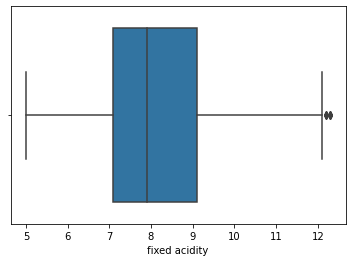

In [ ]:
#Dados apos remover os outliers para fixed acidity e pH

sns.boxplot(df["fixed acidity"])
plt.savefig('boxplot_fixed_acidity2.png', dpi=300)
print(len(df["fixed acidity"]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1505


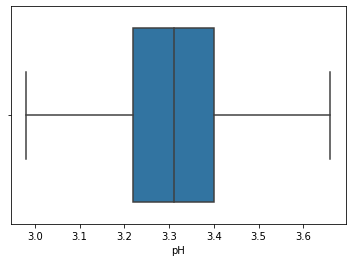

In [ ]:
#Dados apos remover os outliers para fixed acidity e pH

sns.boxplot(df["pH"])
plt.savefig('boxplot_pH2.png', dpi=300)
print(len(df["pH"]))

### iii. Perform a linear regression on the dataset after the removal of the outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


Estimated coefficients: [ 3.7909008  -0.05808867]
X [7.4 7.8 7.8 ... 6.3 5.9 6. ]
Y [3.51 3.2  3.26 ... 3.42 3.57 3.39]
pred [3.36104466 3.33780919 3.33780919 ... 3.42494219 3.44817766 3.44236879]
res [ 0.14895534 -0.13780919 -0.07780919 ... -0.00494219  0.12182234
 -0.05236879]
SStotal: 26.4925
SSreg: 11.0734
SSres: 15.4191
Coefficient of Determinacy, model with intercept: 0.42
Coefficient of Determinacy: 0.42
Coefficient of Determinacy: 0.42


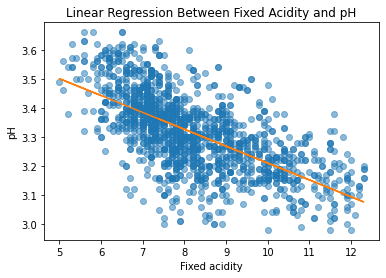

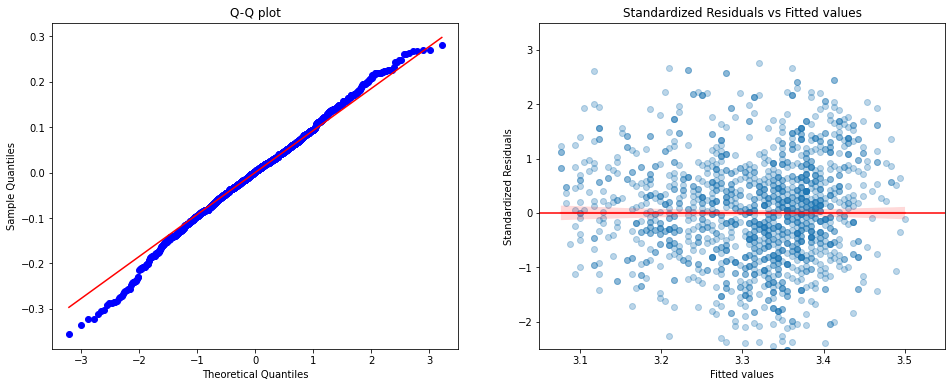

In [ ]:
#AGAIN WITHOUT OUTLIERS

#CALCULAR O COEFICIENTE DA REFRESSAO LINEAR
x = np.array(df["fixed acidity"])
y = np.array(df["pH"])

constant_term = np.ones(len(x))

# append constant term as a column of x
x = np.c_[constant_term, x]
#print(x[:5])

beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
#print('Old shape of coefficients array:',beta.shape)
beta = np.reshape(beta,(-1,1))
#print('New shape of coefficients array:',beta.shape)

# compute new predictions
predictions_with_intercept = dot(x,beta)

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Fixed acidity', ylabel='pH', title = "Linear Regression Between Fixed Acidity and pH")
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot
plt.savefig('lin_reg_no_outliers.png', dpi=300)




#QQ-plot

fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y - predictions_with_intercept[:,0]
degrees_of_freedom = len(y) - x.shape[1]

sm.qqplot(residuals,
          stats.t,
          distargs=(degrees_of_freedom,),
          line='q',
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x[:,1])
leverage = ( (1/len(x))
             + (((x[:,1] - mean_independent_variable)**2)
                / np.sum((x[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0],
            y=standardized_rediduals,
            ax=axs[1],
            lowess=False,
            scatter_kws={'alpha':0.3},
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-2.5,3.5)
axs[1].set_xlim(3.05,3.55)

axs[1].set(ylabel='Standardized Residuals',
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
plt.savefig('qq_plot_no_outliers.png', dpi=300)


#Coeficient of determination r^2

#Definir x, y, predictions e residuals
x = np.array(df["fixed acidity"])
y = np.array(df["pH"])

ones_vector = np.ones(len(x))
x = np.c_[ones_vector, x]
y = np.c_[ones_vector, y]

ones_vector_beta = np.ones(len(beta))
beta = np.c_[ones_vector_beta, beta]

predictions = dot(x,beta)

x = x[:,-1]
y = y[:,-1]
predictions = predictions[:,-1]
residuals = y - predictions

print("X", x)
print("Y", y)
print("pred", predictions)
print("res", residuals)


### SSTotal
def ss_total(y):
    return np.sum((y - np.mean(y))**2)

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    return np.sum((pred[:,0] - np.mean(y))**2)

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    return np.sum((y - pred[:,0])**2)

# SStotal
sstotal = ss_total(y)

# We could also obtain SStotal using the target's variance; don't forget to get an unbiased estimate of the variance
ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1)

# SSReg
ssreg = ss_reg(predictions_with_intercept, y)

# SSRes
ssres = ss_res(predictions_with_intercept, y)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

#DETERMINACY COEFICIENTS
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions_with_intercept),2))


#Using the library
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions),2))

### c) Take the natural log of both of the variables and perform a linear regression on the transformed features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss if this probability plot indicates an acceptable level of normality?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


Estimated coefficients: [ 1.34143961 -0.01755026]
X [7.4 7.8 7.8 ... 6.3 5.9 6. ]
Y [3.51 3.2  3.26 ... 3.42 3.57 3.39]
pred [1.21156769 1.20454759 1.20454759 ... 1.23087298 1.23789308 1.23613806]
res [2.29843231 1.99545241 2.05545241 ... 2.18912702 2.33210692 2.15386194]
SStotal: 26.4925
SSreg: 6746.9168
SSres: 6766.7181
Coefficient of Determinacy, model with intercept: -254.42
Coefficient of Determinacy: -254.42
Coefficient of Determinacy: -254.42


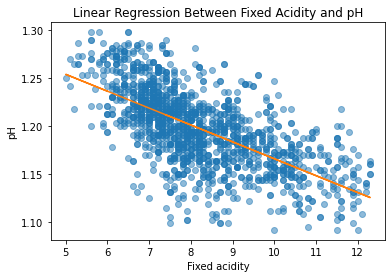

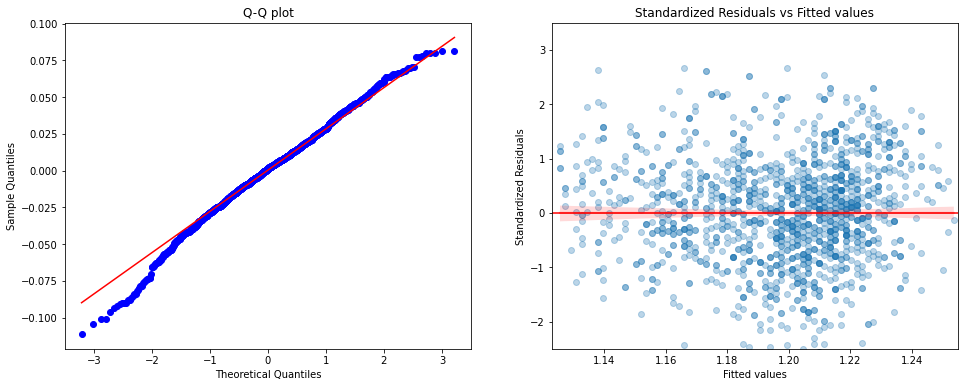

In [ ]:
#PARA OS LOGS

#CALCULAR O COEFICIENTE DA REFRESSAO LINEAR
x = np.array(df["fixed acidity"])
y = np.array(df["pH"])

#USAMOS O LOGARITMO
y = np.log(y)

constant_term = np.ones(len(x))

# append constant term as a column of x
x = np.c_[constant_term, x]
#print(x[:5])

beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
#print('Old shape of coefficients array:',beta.shape)
beta = np.reshape(beta,(-1,1))
#print('New shape of coefficients array:',beta.shape)

# compute new predictions
predictions_with_intercept = dot(x,beta)

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Fixed acidity', ylabel='pH', title = "Linear Regression Between Fixed Acidity and pH")
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot
plt.savefig('lin_reg_log.png', dpi=300)





#QQ-plot
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y - predictions_with_intercept[:,0]
degrees_of_freedom = len(y) - x.shape[1]

sm.qqplot(residuals,
          stats.t,
          distargs=(degrees_of_freedom,),
          line='q',
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x[:,1])
leverage = ( (1/len(x))
             + (((x[:,1] - mean_independent_variable)**2)
                / np.sum((x[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0],
            y=standardized_rediduals,
            ax=axs[1],
            lowess=False,
            scatter_kws={'alpha':0.3},
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-2.5,3.5)
axs[1].set_xlim(1.123,1.255)

axs[1].set(ylabel='Standardized Residuals',
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
plt.savefig('qq_plot_log.png', dpi=300)




#Coeficient of determination r^2

#Definir x, y, predictions e residuals
x = np.array(df["fixed acidity"])
y = np.array(df["pH"])

ones_vector = np.ones(len(x))
x = np.c_[ones_vector, x]
y = np.c_[ones_vector, y]

ones_vector_beta = np.ones(len(beta))
beta = np.c_[ones_vector_beta, beta]

predictions = dot(x,beta)

x = x[:,-1]
y = y[:,-1]
predictions = predictions[:,-1]
residuals = y - predictions

print("X", x)
print("Y", y)
print("pred", predictions)
print("res", residuals)


### SSTotal
def ss_total(y):
    return np.sum((y - np.mean(y))**2)

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    return np.sum((pred[:,0] - np.mean(y))**2)

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    return np.sum((y - pred[:,0])**2)

# SStotal
sstotal = ss_total(y)

# We could also obtain SStotal using the target's variance; don't forget to get an unbiased estimate of the variance
ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1)

# SSReg
ssreg = ss_reg(predictions_with_intercept, y)

# SSRes
ssres = ss_res(predictions_with_intercept, y)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

#DETERMINACY COEFICIENTS
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions_with_intercept),2))


#Using the library
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions),2))

### d) Write the population regression equation for your model. Interpret the meaning of the values of the parameters Beta0 and Beta1.

In [ ]:
#ESTIMATED REGRESSION EQUATION
#correr alinea b) antes desta
print(beta) #A partir daqui, usar sempre o beta da alinea B
#Obter a partir dos valores de beta
#Beta0  3.7909
#Beta1  -0.0581 #slope

[[ 1.          3.7909008 ]
 [ 1.         -0.05808867]]


### e) Find the correlation and determinacy coefficients. Analyse and comment on the meaning of both.

In [ ]:
#Coeficient of determination r^2

#Definir x, y, predictions e residuals
x = np.array(df["fixed acidity"])
y = np.array(df["pH"])

ones_vector = np.ones(len(x))
x = np.c_[ones_vector, x]
y = np.c_[ones_vector, y]

ones_vector_beta = np.ones(len(beta))
beta = np.c_[ones_vector_beta, beta]

predictions = dot(x,beta)

x = x[:,-1]
y = y[:,-1]
predictions = predictions[:,-1]
residuals = y - predictions

print("X", x)
print("Y", y)
print("pred", predictions)
print("res", residuals)


### SSTotal
def ss_total(y):
    return np.sum((y - np.mean(y))**2)

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    return np.sum((pred[:,0] - np.mean(y))**2)

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    return np.sum((y - pred[:,0])**2)

# SStotal
sstotal = ss_total(y)

# We could also obtain SStotal using the target's variance; don't forget to get an unbiased estimate of the variance
ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1)

# SSReg
ssreg = ss_reg(predictions_with_intercept, y)

# SSRes
ssres = ss_res(predictions_with_intercept, y)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

#DETERMINACY COEFICIENTS
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions_with_intercept),2))


#Using the library
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions),2))

X [7.4 7.8 7.8 ... 6.3 5.9 6. ]
Y [3.51 3.2  3.26 ... 3.42 3.57 3.39]
pred [3.36104466 3.33780919 3.33780919 ... 3.42494219 3.44817766 3.44236879]
res [ 0.14895534 -0.13780919 -0.07780919 ... -0.00494219  0.12182234
 -0.05236879]
SStotal: 26.4925
SSreg: 11.0734
SSres: 15.4191
Coefficient of Determinacy, model with intercept: 0.42
Coefficient of Determinacy: 0.42
Coefficient of Determinacy: 0.42


### f) Test the statistical hypothesis for determining whether a linear relationship exists between the chosen variables.

In [ ]:
from statsmodels.formula.api import ols

# Construct a Pandas Dataframe
df2 = pd.DataFrame({'fixed_acidity':df["fixed acidity"], 'pH':df["pH"]})
print(df2)
# Fit a model according to the formula, target ~ dependent_variables
lr_fit = ols('pH ~ fixed_acidity', data=df2).fit()

# model summary
print(lr_fit.summary())


#OTHER QUANTITIES OF INTEREST
print('Parameters: ', lr_fit.params)
print('Standard errors: ', lr_fit.bse)
print('Predicted values: ', lr_fit.predict()) # predicting the trainning data
"""
#FOR A QUICK CHECK OF ALL THE REGRESSORS
fig = plt.figure(figsize=(6,6))
fig = sm.graphics.plot_partregress_grid(lr_fit, fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lr_fit, "pH", fig=fig)"""

      fixed_acidity    pH
0               7.4  3.51
1               7.8  3.20
2               7.8  3.26
3              11.2  3.16
4               7.4  3.51
...             ...   ...
1594            6.2  3.45
1595            5.9  3.52
1596            6.3  3.42
1597            5.9  3.57
1598            6.0  3.39

[1505 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     1079.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          7.11e-179
Time:                        15:45:57   Log-Likelihood:                 1311.7
No. Observations:                1505   AIC:                            -2619.
Df Residuals:                    1503   BIC:                            -2609.
Df Model:                      

'\n#FOR A QUICK CHECK OF ALL THE REGRESSORS\nfig = plt.figure(figsize=(6,6))\nfig = sm.graphics.plot_partregress_grid(lr_fit, fig=fig)\n\nfig = plt.figure(figsize=(12,8))\nfig = sm.graphics.plot_regress_exog(lr_fit, "pH", fig=fig)'

### g) Construct and interpret a 95% confidence interval for the unknown true slope of the regression line.

In [ ]:
#ver slides 50 - IC slope
#IC 100(1-alpha) é dado por b1 +- t(n-2)(s)
#Sendo s = 0.002  (ver tabela anterior)
s = 0.002 #ver tabela, valor abaixo de std err de fixed_acidity
b1 = -0.0581 #slope
df = 1503 #DF = 1503 !!!!!!!!!!!!!!!!!!!!!!! CONFIRMAR ISTO

from scipy.stats import t
print(t.ppf(0.975, df)) #alpha = 5, mas é bilateral
ic_plus = b1 + t.ppf(0.975, df) * s
ic_minus = b1 - t.ppf(0.975, df) * s

print("IC: ", ic_minus, ic_plus)

1.9615435921728508
IC:  -0.0620230871843457 -0.054176912815654295


### h) Construct a 95% confidence interval for the population correlation coefficient. Interpret the results.

In [ ]:
#Slide 62 - Confidence Interval for Coefficient of Determinacy
import math

#Coefficient of Determinacy: 0.42
x = np.array(df2["fixed_acidity"])
n = len(x) #1505
r = -math.sqrt(0.42)
t_meio = t.ppf(0.975, df) #alpha = 5, mas é bilateral

ic_plus = r + t_meio * np.sqrt((1-r**2)/(n-2))
ic_minus = r - t_meio * np.sqrt((1-r**2)/(n-2))

print("IC: ", ic_minus, ic_plus)

IC:  -0.6866070386170482 -0.6095411010645237


### i) Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.


In [ ]:
#Slide 54 - Confidence Interval for Mean Value of y Given x
#Value of choice x = 8
#IC = y +- t(n-2)(s) sqrt(1/n + (xp-meanx)^2/sum(xp-meanx)^2)
from scipy.stats import t

x = np.array(df2["fixed_acidity"])
n = len(x) #1505
df = 1503
#t(n-2)(s)  -> t.ppf(0.95, df) * s

meanx = np.mean(x) #8.1974
print(meanx)


xp = 8
print(x)
yp = -0.05808 * xp + 3.7909
print(yp)


x_minus_mean = xp - meanx
all_x_minus_mean = x - meanx
x_minus_mean_squared_sum = sum(all_x_minus_mean ** 2)
print(x_minus_mean)


ic_plus = yp + t.ppf(0.975, df) * s * np.sqrt(1/n + x_minus_mean/x_minus_mean_squared_sum)
ic_minus = yp - t.ppf(0.975, df) * s * np.sqrt(1/n + x_minus_mean/x_minus_mean_squared_sum)


print("IC: ", ic_minus, ic_plus)

8.197408637873753
[7.4 7.8 7.8 ... 6.3 5.9 6. ]
3.32626
-0.19740863787375318
IC:  3.3261635608580042 3.3263564391419957


### j) Construct and interpret a 95% confidence interval for a randomly chosen value of the y‐variable at a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction interval is useful.

In [ ]:
#Slide 56  Prediction Interval for Randomly Chosen Value of y, given x:

#Value of choice x = 8
#IC = y +- t(n-2)(s) sqrt(1/n + (xp-meanx)^2/sum(xp-meanx)^2)
from scipy.stats import t

x = np.array(df2["fixed_acidity"])
n = len(x) #1505
df = 1503
#t(n-2)(s)  -> t.ppf(0.95, df) * s

meanx = np.mean(x) #8.1974
print(meanx)
n = len(x)

xp = 8
print(x)
yp = -0.05808 * xp + 3.7909
print(yp)


x_minus_mean = xp - meanx
all_x_minus_mean = x - meanx
x_minus_mean_squared_sum = sum(all_x_minus_mean ** 2)
print(x_minus_mean)


ic_plus = yp + t.ppf(0.975, df) * s * np.sqrt(1 + 1/n + x_minus_mean/x_minus_mean_squared_sum)
ic_minus = yp - t.ppf(0.975, df) * s * np.sqrt(1 + 1/n + x_minus_mean/x_minus_mean_squared_sum)


print("IC: ", ic_minus, ic_plus)

8.197408637873753
[7.4 7.8 7.8 ... 6.3 5.9 6. ]
3.32626
-0.19740863787375318
IC:  3.322335727638901 3.330184272361099


## 3. Principal Component Analysis

Select a subset of 3 to 6 features related to the same aspect of the phenomenon to which your data set
relates to. Explain your choice.

Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from plotly.offline import plot
from plotly.graph_objs import *
from plotly.graph_objs import Scatter, Layout, Figure, Data, Stream, YAxis, Marker
from plotly.graph_objs.layout import YAxis
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure, axes, pie, title, show
%matplotlib inline


import warnings
warnings.filterwarnings(action='ignore')
sns.set_style("darkgrid")
from numpy import linspace
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import *
import statistics
import statsmodels.api as sm
from scipy.stats import gaussian_kde
import scipy.stats as stats
import scipy
from numpy.linalg import inv
from numpy import dot


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# loading dataset into Pandas DataFrame
data = pd.read_csv(url, delimiter=';')
data.head()
# data.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# X = data.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'], axis = 1)
X = data.drop(['volatile acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','quality'], axis = 1)
# X = data.drop(columns='quality')
Y = data['quality']
X = np.array(X)
Y = np.array(Y)
X.shape
print(X)
print(Y)

[[ 7.4      1.9      0.9978   3.51     9.4    ]
 [ 7.8      2.6      0.9968   3.2      9.8    ]
 [ 7.8      2.3      0.997    3.26     9.8    ]
 ...
 [ 6.3      2.3      0.99574  3.42    11.     ]
 [ 5.9      2.       0.99547  3.57    10.2    ]
 [ 6.       3.6      0.99549  3.39    11.     ]]
[5 5 5 ... 6 5 6]


In [ ]:
#Add classification of the wine quality
Z = data['wine_quality'] = pd.cut(x=Y, bins=[2, 4, 5, 8], labels=['Low', 'Medium', 'High'])

In [ ]:
# Cálculo da variância, de cada uma das 5 colunas, antes das normalizações
qwer = np.var(X, axis = 0)
print(qwer)
np.round_(qwer, 3)

[3.02952057e+00 1.98665392e+00 3.55980179e-06 2.38202742e-02
 1.13493717e+00]


array([3.03 , 1.987, 0.   , 0.024, 1.135])

### a) Visualize the data over these features in 2D/3D PC plane using two types of normalization: by range and by standard deviations.

Normalization by range

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_norm=scaler.fit_transform(X)
print(X_norm)

[[0.24778761 0.06849315 0.56754772 0.60629921 0.15384615]
 [0.28318584 0.11643836 0.49412628 0.36220472 0.21538462]
 [0.28318584 0.09589041 0.50881057 0.40944882 0.21538462]
 ...
 [0.15044248 0.09589041 0.41629956 0.53543307 0.4       ]
 [0.11504425 0.07534247 0.39647577 0.65354331 0.27692308]
 [0.12389381 0.18493151 0.3979442  0.51181102 0.4       ]]


In [ ]:
# Cálculo da variância, de cada uma das 5 colunas, após a Range Normalization
print(np.var(X_norm, axis = 0))

[0.02372559 0.00932001 0.01918985 0.0147686  0.02686242]


In [ ]:
from sklearn.decomposition import PCA
pca_norm=PCA(n_components=3)
pca_norm.fit(X_norm)
new_data_norm=pca_norm.transform(X_norm)
#new_data_norm_Df = pd.DataFrame(data = new_data_norm, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
#print(new_data_norm_Df)
print(new_data_norm)

[[ 0.00137418 -0.217334    0.07011836]
 [-0.05053545 -0.08072291 -0.05514309]
 [-0.03853914 -0.09485559 -0.03643028]
 ...
 [ 0.21871009 -0.03260387  0.03299116]
 [ 0.24544654 -0.18090512  0.0516033 ]
 [ 0.22659962 -0.0316443   0.07238042]]


In [ ]:
print(pca_norm.explained_variance_ratio_)
sum(pca_norm.explained_variance_ratio_)

[0.50425178 0.27393774 0.12847798]


0.9066674962064111

In [ ]:
print(pca_norm.components_)

[[-0.58416931 -0.0992833  -0.56287229  0.38569104  0.42814279]
 [ 0.49703286  0.08048785 -0.06800897 -0.24299654  0.82632167]
 [-0.10212202  0.65406024  0.49794545  0.52578923  0.19331917]]


In [ ]:
print(pca_norm.singular_values_)

[8.69967837 6.41217571 4.39130721]


          PC_1      PC_2      PC_3  quality
0     0.001374 -0.217334  0.070118      5.0
1    -0.050535 -0.080723 -0.055143      5.0
2    -0.038539 -0.094856 -0.036430      5.0
3    -0.283283  0.066629 -0.089918      6.0
4     0.001374 -0.217334  0.070118      5.0
...        ...       ...       ...      ...
1594  0.236811 -0.103765 -0.012705      5.0
1595  0.309234 -0.041362  0.056808      6.0
1596  0.218710 -0.032604  0.032991      6.0
1597  0.245447 -0.180905  0.051603      5.0
1598  0.226600 -0.031644  0.072380      6.0

[1599 rows x 4 columns]


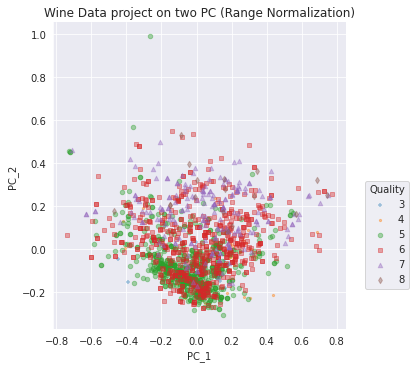

In [ ]:
# 2D plotting
names = ["PC_"+str(i+1) for i in range(new_data_norm.shape[1])]
names.append('quality')
data_pca = pd.DataFrame(data= np.c_[new_data_norm, Y], columns=names)
print(data_pca)
data_pca['quality'] = data_pca['quality'].astype(int)
ax = sns.lmplot('PC_1', 'PC_2', data=data_pca, hue='quality', markers=['+','.','o', 's', '^', 'd'], fit_reg=False, scatter_kws={'alpha':0.4, "s": 20}, legend_out=False)
plt.title('Wine Data project on two PC (Range Normalization)')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Quality');

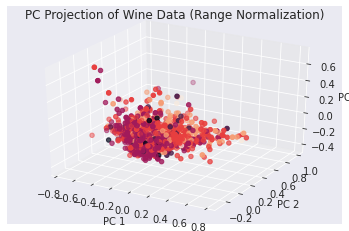

In [ ]:
# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC_1'],
           data_pca['PC_2'],
           data_pca['PC_3'],
           c=data_pca['quality']);
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PC Projection of Wine Data (Range Normalization)');

Normalization by standard deviations

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
X_std=standard_scaler.fit_transform(X)
print(X_std)
# X_std.shape

[[-0.52835961 -0.45321841  0.55827446  1.28864292 -0.96024611]
 [-0.29854743  0.04341614  0.02826077 -0.7199333  -0.58477711]
 [-0.29854743 -0.16942723  0.13426351 -0.33117661 -0.58477711]
 ...
 [-1.1603431  -0.16942723 -0.53355375  0.70550789  0.54162988]
 [-1.39015528 -0.38227061 -0.67665745  1.6773996  -0.20930812]
 [-1.33270223  0.75289408 -0.66605717  0.51112954  0.54162988]]


In [ ]:
# Cálculo da variância, de cada uma das 5 colunas, após a Range Normalization
print(np.var(X_std, axis = 0))

[1. 1. 1. 1. 1.]


In [ ]:
np.mean(X_std),np.std(X_std)

(-6.313565471969671e-15, 1.0)

In [ ]:
from sklearn.decomposition import PCA
pca_std=PCA(n_components=3)
pca_std.fit(X_std)
new_data_std=pca_std.transform(X_std)
#new_data_std_Df = pd.DataFrame(data = new_data_std, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
#print(new_data_std_Df)
print(new_data_std)

[[-0.41246317 -1.31210886  0.91373348]
 [ 0.38298674 -0.43447148 -0.01193416]
 [ 0.20855157 -0.60282511  0.04966779]
 ...
 [-1.48761574  0.05428822  0.28219652]
 [-1.98756589 -0.78619745  0.83764604]
 [-1.36393286  0.56372622  0.85648527]]


In [ ]:
print(pca_std.explained_variance_ratio_)
sum(pca_std.explained_variance_ratio_)

[0.47008132 0.210675   0.2049907 ]


0.8857470196774198

In [ ]:
print(pca_std.components_)

[[ 0.55636227  0.2172805   0.56501269 -0.48380222 -0.29991046]
 [ 0.22677984  0.5588057  -0.10590167 -0.09823539  0.78450095]
 [-0.34750797  0.69810515  0.30678672  0.45701793 -0.29816761]]


In [ ]:
print(pca_std.singular_values_)

[61.30497632 41.04079253 40.48333793]


          PC_1      PC_2      PC_3  quality
0    -0.412463 -1.312109  0.913733      5.0
1     0.382987 -0.434471 -0.011934      5.0
2     0.208552 -0.602825  0.049668      5.0
3     1.846623 -0.310897 -0.960785      6.0
4    -0.412463 -1.312109  0.913733      5.0
...        ...       ...       ...      ...
1594 -1.770659 -0.417820  0.245765      5.0
1595 -2.186331  0.080954  0.451855      6.0
1596 -1.487616  0.054288  0.282197      6.0
1597 -1.987566 -0.786197  0.837646      5.0
1598 -1.363933  0.563726  0.856485      6.0

[1599 rows x 4 columns]


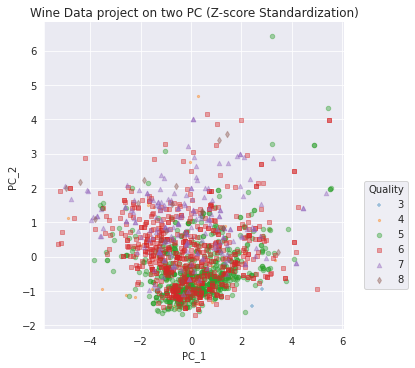

In [ ]:
# 2D plotting
names = ["PC_"+str(i+1) for i in range(new_data_std.shape[1])]
names.append('quality')
data_pca = pd.DataFrame(data= np.c_[new_data_std, Y], columns=names)
print(data_pca)
data_pca['quality'] = data_pca['quality'].astype(int)
ax = sns.lmplot('PC_1', 'PC_2', data=data_pca, hue='quality', markers=['+','.','o', 's', '^', 'd'], fit_reg=False, scatter_kws={'alpha':0.4, "s": 20}, legend_out=False)
plt.title('Wine Data project on two PC (Z-score Standardization)')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Quality');

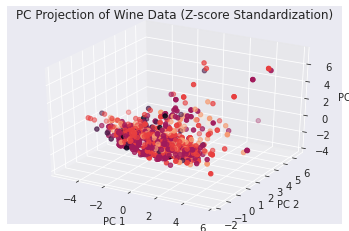

In [ ]:
# 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC_1'],
           data_pca['PC_2'],
           data_pca['PC_3'],
           c=data_pca['quality']);
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PC Projection of Wine Data (Z-score Standardization)');

### b) Choose between conventional PCA or SVD for the visualization. Make a comment whether one of the normalizations is better and why.

Normalization by range

In [ ]:
# SVD with data transformed with Range Normalization
from sklearn.decomposition import TruncatedSVD
svd_norm = TruncatedSVD(n_components=3, n_iter=7, random_state=42)

svd_norm.fit(X_norm)
new_X_norm=svd_norm.transform(X_norm)

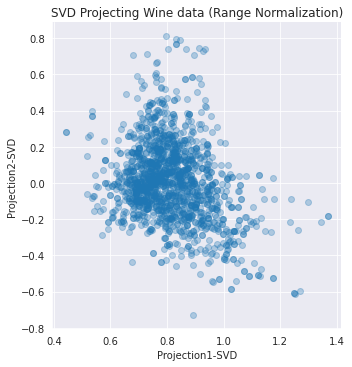

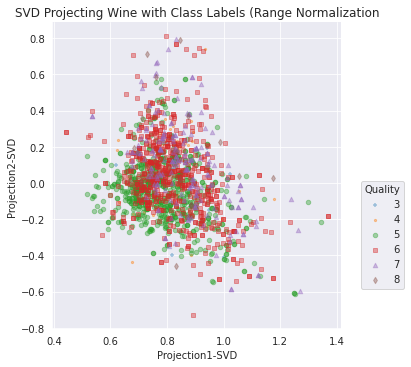

In [ ]:
# 2D plotting
names = ["U_"+str(x+1) for x in range(new_X_norm.shape[1])]
names.append('quality')
ds_us = pd.DataFrame(data= np.c_[new_X_norm, Y], columns=names)
ds_us['quality'] = ds_us['quality'].astype(int)

# 1st plot
ax = sns.lmplot('U_1', 'U_2', data=ds_us, fit_reg=False, scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', ylabel='Projection2-SVD', title='SVD Projecting Wine data (Range Normalization)');

# 2nd plot
ax2 = sns.lmplot('U_1', 'U_2', data=ds_us, hue='quality', markers=['+','.','o', 's', '^', 'd'], fit_reg=False, scatter_kws={'alpha':0.4, "s": 20}, legend_out=False);
ax2.set(xlabel='Projection1-SVD', ylabel='Projection2-SVD', title='SVD Projecting Wine with Class Labels (Range Normalization');
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Quality');

Normalization by standard deviations

In [ ]:
# SVD with data transformed with normalization by Z-score Standardization
from sklearn.decomposition import TruncatedSVD
svd_std = TruncatedSVD(n_components=3, n_iter=7, random_state=42)

svd_std.fit(X_std)
new_X_std=svd_std.transform(X_std)

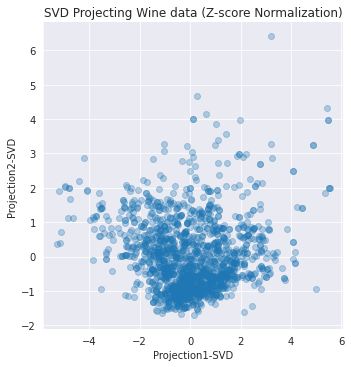

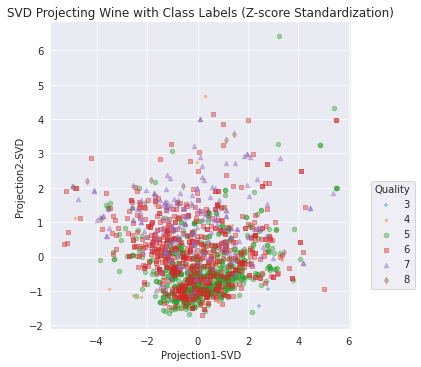

In [ ]:
# 2D plotting
names = ["U_"+str(x+1) for x in range(new_X_std.shape[1])]
names.append('quality')
ds_us = pd.DataFrame(data= np.c_[new_X_std, Y], columns=names)
ds_us['quality'] = ds_us['quality'].astype(int)

# 1st plot
ax = sns.lmplot('U_1', 'U_2', data=ds_us, fit_reg=False, scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', ylabel='Projection2-SVD', title='SVD Projecting Wine data (Z-score Normalization)');

# 2nd plot
ax2 = sns.lmplot('U_1', 'U_2', data=ds_us, hue='quality', markers=['+','.','o', 's', '^', 'd'],fit_reg=False,scatter_kws={'alpha':0.4, "s": 20}, legend_out=False);
ax2.set(xlabel='Projection1-SVD', ylabel='Projection2-SVD', title='SVD Projecting Wine with Class Labels (Z-score Standardization)');
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Quality');

In [ ]:
# De forma a confirmar a nossa decisão calculámos a variância explicada pelas componentes:
print('Variancia explicada svd_norm:', svd_norm.explained_variance_ratio_.cumsum())
print('Variancia explicada svd_std:',svd_std.explained_variance_ratio_.cumsum())
print('Variancia explicada pca_norm:', pca_norm.explained_variance_ratio_.cumsum())
print('Variancia explicada pca_std:',pca_std.explained_variance_ratio_.cumsum())

Variancia explicada svd_norm: [0.15046796 0.63680366 0.88819509]
Variancia explicada svd_std: [0.47008132 0.68075632 0.88574702]
Variancia explicada pca_norm: [0.50425178 0.77818952 0.9066675 ]
Variancia explicada pca_std: [0.47008132 0.68075632 0.88574702]


### c) At these visualizations, use a distinct shape/colour for data points representing a pre‐specified, by yourself, group of objects. Comment on the choice of your groups

          PC_1      PC_2      PC_3 wine_quality
0     0.001374 -0.217334  0.070118       Medium
1    -0.050535 -0.080723 -0.055143       Medium
2    -0.038539 -0.094856  -0.03643       Medium
3    -0.283283  0.066629 -0.089918         High
4     0.001374 -0.217334  0.070118       Medium
...        ...       ...       ...          ...
1594  0.236811 -0.103765 -0.012705       Medium
1595  0.309234 -0.041362  0.056808         High
1596   0.21871 -0.032604  0.032991         High
1597  0.245447 -0.180905  0.051603       Medium
1598    0.2266 -0.031644   0.07238         High

[1599 rows x 4 columns]


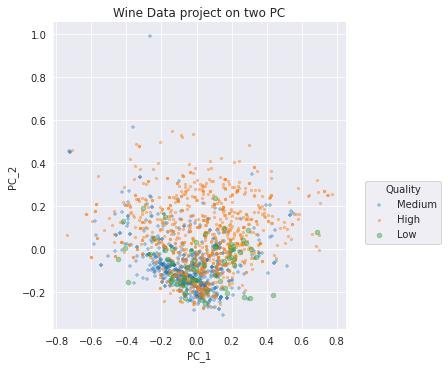

In [ ]:
# 2D plotting
names = ["PC_"+str(i+1) for i in range(new_data_norm.shape[1])]
names.append('wine_quality')
data_pca = pd.DataFrame(data= np.c_[new_data_norm, np.array(Z)], columns=names)
print(data_pca)
data_pca['wine_quality'] = data_pca['wine_quality'].astype(str)
ax = sns.lmplot('PC_1', 'PC_2', data=data_pca, hue='wine_quality', markers=['+','.','o'], fit_reg=False, scatter_kws={'alpha':0.4, "s": 20}, legend_out=False)
plt.title('Wine Data project on two PC')
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Quality');

In [ ]:
data_pca['number_quality'] = data_pca.wine_quality.factorize()[0]
print(data_pca)
"""
data_pca['number_quality'] = data_pca.groupby('wine_quality').ngroup()
print(data_pca)
"""
result = data_pca.number_quality.dtypes

print(result)

          PC_1      PC_2      PC_3 wine_quality  number_quality
0     0.001374 -0.217334  0.070118       Medium               0
1    -0.050535 -0.080723 -0.055143       Medium               0
2    -0.038539 -0.094856  -0.03643       Medium               0
3    -0.283283  0.066629 -0.089918         High               1
4     0.001374 -0.217334  0.070118       Medium               0
...        ...       ...       ...          ...             ...
1594  0.236811 -0.103765 -0.012705       Medium               0
1595  0.309234 -0.041362  0.056808         High               1
1596   0.21871 -0.032604  0.032991         High               1
1597  0.245447 -0.180905  0.051603       Medium               0
1598    0.2266 -0.031644   0.07238         High               1

[1599 rows x 5 columns]
int64


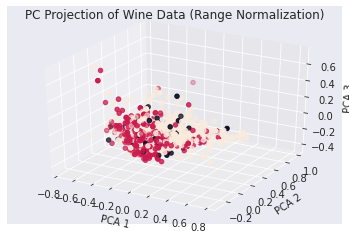

In [ ]:
#3D plotting
import seaborn as sns
from matplotlib.colors import ListedColormap
import pandas as pd

code_quality = []
for i in range (len(data_pca['wine_quality'])):
  if data_pca['wine_quality'][i] == 'Low':
    code_quality += [0]
  elif data_pca['wine_quality'][i] == 'Medium':
    code_quality += [1]
  elif data_pca['wine_quality'][i] == 'High':
    code_quality += [2]
#print(code_quality)

data_pca['code_quality'] = code_quality
#print(data_pca)

x = list(data_pca['PC_1'])
y = list(data_pca['PC_2'])
z = list(data_pca['PC_3'])
classe = data_pca['code_quality']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.add_axes(ax)
ax.scatter(x,
           y,
           z,
           c=classe)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PC Projection of Wine Data (Range Normalization)');

plt.show()

### d) Calculate and make a graphical presentation of the “quality” of the PC projection of your data. Discuss your results.

In [ ]:
#Normalize the data by range
means = X.mean(axis=0)
Rmax = X.max(axis=0)
Rmin = X.min(axis=0)
x_norm_range = (X - Rmin)/(Rmax - Rmin)
print(x_norm_range)

[[0.24778761 0.06849315 0.56754772 0.60629921 0.15384615]
 [0.28318584 0.11643836 0.49412628 0.36220472 0.21538462]
 [0.28318584 0.09589041 0.50881057 0.40944882 0.21538462]
 ...
 [0.15044248 0.09589041 0.41629956 0.53543307 0.4       ]
 [0.11504425 0.07534247 0.39647577 0.65354331 0.27692308]
 [0.12389381 0.18493151 0.3979442  0.51181102 0.4       ]]


In [ ]:
## Covariance matrix of the range normalized dataset
covmatrix_r = np.cov(x_norm_range.T)

## Obtain the eingenvalues and eingenvectors of covariance matrix
# The eigenvalues are not necessarily ordered
e_r, v_r = np.linalg.eig(covmatrix_r)
"""
# order descendingly by largest eigenvalue
order_r = np.argsort((np.argsort(e_r) * -1))
e_r = e_r[order_r]
v_r = v_r[:,order_r]
"""
idx = e_r.argsort()[::-1]
e_r = e_r[idx]
v_r = v_r[:,idx]
print('Eigenvalues \n%s' %e_r)
print('\nEigenvectors \n%s' %v_r)

Eigenvalues 
[0.04736195 0.02572966 0.01206732 0.00737803 0.00138824]

Eigenvectors 
[[-0.58416931 -0.49703286  0.10212202  0.2999152   0.55796642]
 [-0.0992833  -0.08048785 -0.65406024 -0.67859995  0.30882331]
 [-0.56287229  0.06800897 -0.49794545  0.28529486 -0.59093717]
 [ 0.38569104  0.24299654 -0.52578923  0.60066229  0.39363129]
 [ 0.42814279 -0.82632167 -0.19331917  0.08581743 -0.29857882]]


In [ ]:
# generate PCA component space (PCA scores) for range normalised data
pc_r = np.dot(x_norm_range, v_r)
print(pc_r)
pc_r.shape

[[-0.17129473 -0.06987092 -0.65062889  0.56713803  0.01674754]
 [-0.22320437 -0.206482   -0.52536744  0.38293484 -0.01976469]
 [-0.21120805 -0.19234933 -0.54408026  0.42944577 -0.01619111]
 ...
 [ 0.04604117 -0.25460105 -0.6135017   0.45475831 -0.04112016]
 [ 0.07277763 -0.1062998  -0.63211384  0.51281227  0.0277378 ]
 [ 0.05393071 -0.25556062 -0.65289096  0.36694711 -0.02688697]]


(1599, 5)

In [ ]:
u, s, vh = np.linalg.svd(x_norm_range, full_matrices=True)

In [ ]:
totVar = sum(e_r)       # Total variability of the Data
var_exp = [(i / totVar)*100 for i in sorted(e_r, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,4)],
        y=var_exp,
        name='Exp Var',
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,4)],
        y=cum_var_exp,
        name='Cum. Exp Var')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
fig.show()

In [ ]:
from sklearn.decomposition import PCA
pca_norm_sp=PCA(n_components=5)
pca_norm_sp.fit(X_norm)
new_data_norm_sp=pca_norm.transform(X_norm)
#new_data_norm_Df = pd.DataFrame(data = new_data_norm, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
#print(new_data_norm_Df)
print(new_data_norm_sp)

[[ 0.00137418 -0.217334    0.07011836]
 [-0.05053545 -0.08072291 -0.05514309]
 [-0.03853914 -0.09485559 -0.03643028]
 ...
 [ 0.21871009 -0.03260387  0.03299116]
 [ 0.24544654 -0.18090512  0.0516033 ]
 [ 0.22659962 -0.0316443   0.07238042]]


In [ ]:
print(pca_norm_sp.explained_variance_ratio_)
sum(pca_norm_sp.explained_variance_ratio_)

[0.50425178 0.27393774 0.12847798 0.07855223 0.01478027]


1.0000000000000002

[1 2 3 4 5]


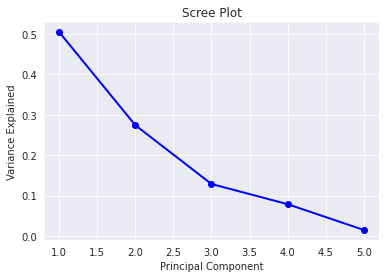

In [ ]:
PC_values = np.arange(pca_norm_sp.n_components_) + 1
print(PC_values)
plt.plot(PC_values, pca_norm_sp.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

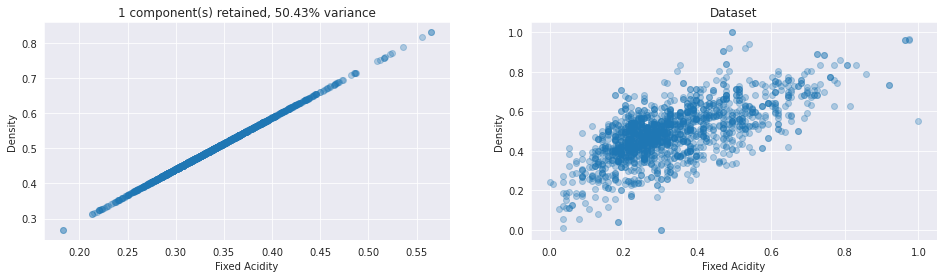

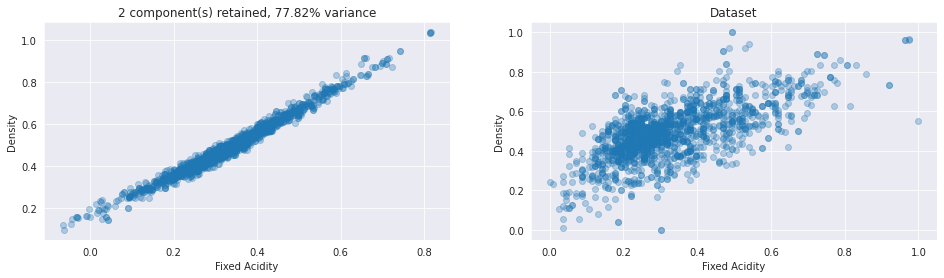

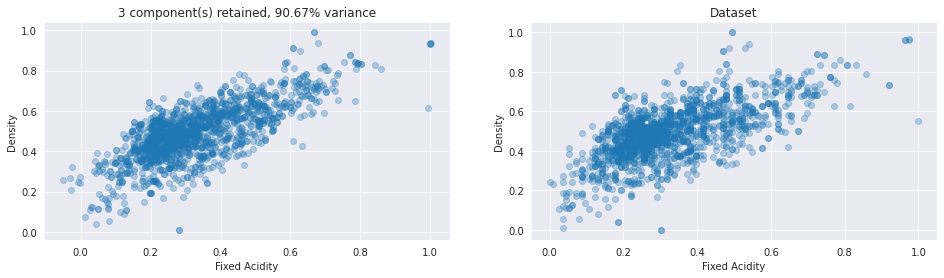

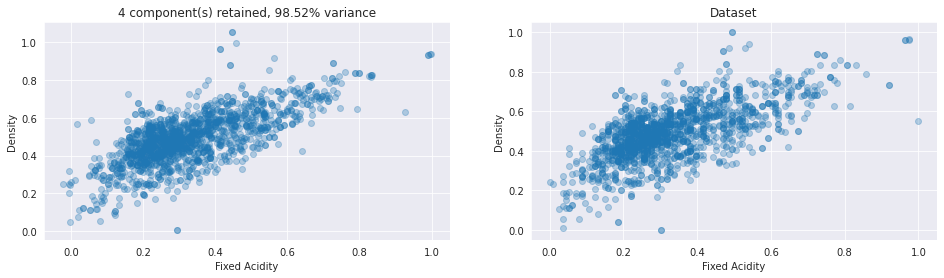

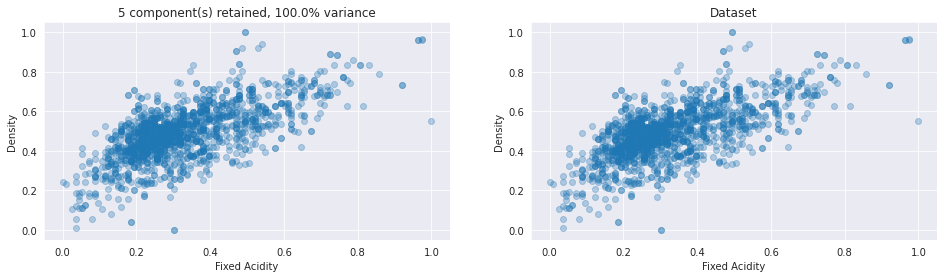

In [ ]:
r = X.shape[1]
#var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 3
f1=0
f2=2

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:])

    approx.append(approximation)

    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))

    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'Fixed Acidity',
           ylabel= 'Density',
           title= (str(n)
                   + ' component(s) retained, '
                   + str(round(cum_var_exp[n-1],2))
                   + '% variance'))


    sns.regplot(x=X_norm[:,f1],
                y=X_norm[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='Fixed Acidity',
           ylabel= 'Density',
           title='Dataset');

## 4. Fuzzy Clustering with Anomalous Patterns

a) Study the fuzzy c-means (FCM) program in the software package of your choice1 (ver enunciado).
Apply the program to your dataset at the same hyperparameter c with random seeds. Do this for several different values c= c_min, ..., c_max. Plot the FCM clustering criterion (FCM cost function) in function of c. Analyse the graphic and comment if any number of clusters better fits your data than the others.
Hint: If, at a given c, the fuzzy c-means converges to the same result at any initialization, then it is likely
that parameter c is correct.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from plotly.offline import plot
from plotly.graph_objs import *
from plotly.graph_objs import Scatter, Layout, Figure, Data, Stream, YAxis, Marker
from plotly.graph_objs.layout import YAxis
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# loading dataset into Pandas DataFrame
df = pd.read_csv(url, delimiter=';')

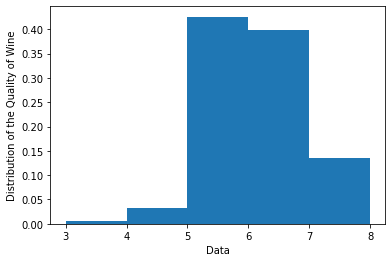

In [ ]:
# Set up the loop and plot
data = df

#Orgainze the data
y_values = data['quality']
plt.hist(y_values, density=True, bins=5)
plt.ylabel('Distribution of the Quality of Wine')
plt.xlabel('Data')
plt.savefig('distribution_wine_quality.png', dpi=300)

#Define the target/class
target=data['quality']

#Select the variables (exclude class)
x_fpc = data[['fixed acidity','volatile acidity','citric acid', 'residual sugar',\
              'chlorides','free sulfur dioxide','total sulfur dioxide',\
              'density', 'pH', 'sulphates', 'alcohol']].values


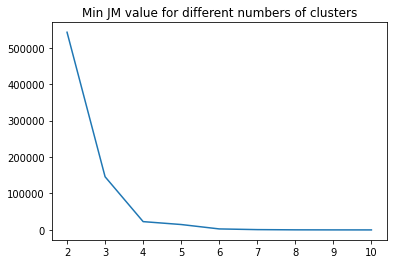

In [ ]:
# Set up the loop and plot
#fig1, axes1 = plt.subplots(3, 3, figsize=(12, 12))
jm_list = []
fpc_list = []

#Calculate the JM functions
for ncenters in range(2, 11):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(x_fpc, ncenters, 2, error=0.005, maxiter=1000, init=None)
    jm_list += [min(jm)]
    fpc_list += [fpc]

#Plot the Min JM value for different numbers of clusters
plt.plot(np.arange(2, 11, 1), jm_list)
plt.title(label = 'Min JM value for different numbers of clusters')
plt.savefig('jm_values_for_c.png', dpi=300)

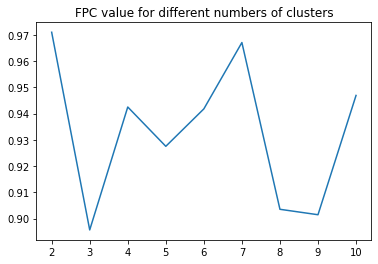

In [ ]:
plt.plot(np.arange(2, 11, 1), fpc_list)
plt.title(label = 'FPC value for different numbers of clusters')
plt.savefig('jpc_values_for_c.png', dpi=300)

b) Study the (Iterative) Anomalous Pattern (IAP) clustering algorithm. Test the implementation with the benchmark data sets provided to you.


In [ ]:
#Add classification of the wine quality
data['wine_quality'] = pd.cut(x=y_values, bins=[3, 4, 5, 8], labels=['low', 'medium', 'high'])

In [ ]:
x = data.drop(['quality', 'wine_quality'], axis = 1)
y = data['wine_quality']

In [ ]:
#Definir as funcoes do algoritmo anomalous pattern clustering
def center_(x, cluster):
    """ Finds the centroid of a cluster
    X - the original data matrix
    cluster - the set with indices of the objects belonging to the cluster
    """
    mm = x.shape[1] #number of columns = numero de variaveis = 11
    centroidC = []

    for j in range(mm):
        zz = x[:, j] #lista dos valores para cada variavel j no range mm = 11
        zc = []
        for i in cluster:
            zc.append(zz[i]) #adiciona os valores da variavel j que pertencem ao cluster i
        centroidC.append(np.mean(zc)) #para cada cluster adiciona os centros
    return centroidC


def distNorm(x ,remains, ranges, p):
    """ Finds the normalized distances of data points in 'remains' to reference point 'p'
     X - the original data matrix;
     remains- the set of X-row indices under consideration
     ranges- the vector with ranges of data features
     p - the data point the distances relate to
     distan- the output column of distances from p to remains
    """
    mm = x.shape[1] #number of columns = numero de variaveis = 11
    rr = len(remains)
    z = x[remains, :]
    az = np.tile(np.array(p), (rr, 1))
    rz = np.tile(np.array(ranges), (rr, 1))
    dz = (z - az) / rz
    dz = np.array(dz)
    ddz = dz * dz
    if mm > 1:
        di = sum(ddz.T)
    else:
        di = ddz.T
    distan = di
    return distan


def separCluster(x0, remains, ranges, a, b):
    """  Builds a cluster by splitting the points around refernce point 'a' from those around reference point b
    x0 - data matrix
    remains- the set of X-row indices under consideration
    ranges- the vector with ranges of data features
    a, b - the reference points
    cluster - set with row indices of the objects belonging to the cluster
    """
    dista = distNorm(x0, remains, ranges, a)
    distb = distNorm(x0, remains, ranges, b)
    clus = np.where(dista < distb)[0]
    cluster = []
    for i in clus:
        cluster.append(remains[i])
    return cluster


def anomalousPattern(x, remains, ranges, centroid, me):
    """ Builds one anomalous cluster based on the algorithm 'Separate/Conquer' (Mirkin, 1999, Machine Learning Journal)
        X - data matrix,
        remains - set of its row indices (objects) under consideration,
        ranges - normalizing values: the vector with ranges of data features
        centroid - initial center of the anomalous cluster being build
        me - vector to shift the 0 (origin) to,
        output: cluster - set of row indices in the anomalous cluster,
        centroid -center of the cluster    """
    key = 1
    while key == 1:
        cluster = separCluster(x, remains, ranges, centroid, me)
        if len(cluster) != 0:
            newcenter = center_(x, cluster)
        ## Check Stop condition of slide #56
        if  len([i for i, j in zip(centroid, newcenter) if i == j]) != len(centroid):
            centroid = newcenter
        else:
            key = 0
    return (cluster, centroid)


def dist(x, remains, ranges, p):
    """ Calculates the normalized distances of data points in 'remains' to reference point 'p'
        X - data matrix,
        remains - set of its row indices (objects) under consideration,
        ranges - normalizing values: the vector with ranges of data features
        distan - the calculated normalized distances
    """
    mm = x.shape[1] #number of columns = numero de variaveis = 11
    rr = len(remains)
    distan = np.zeros((rr,1))
    for j in range(mm):
        z = x[:, j]
        z = z.reshape((-1,1))
        zz = z[remains]
        y = zz - p[j]
        y = y / ranges[j]
        y = np.array(y)
        yy = y * y
        distan = distan + yy
    return distan

In [ ]:
#Normalizar o dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

#Utilizamos normalizacao
normalization = True

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.15044248 0.26712329 0.13       ... 0.53543307 0.25149701 0.4       ]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]


In [ ]:
#Main body for the Iterative Anomalous Cluster
threshold = 100 # threshold value: minimo de pontos que um cluster pode ter
nn = x.shape[0] #number of data points
mm = x.shape[1] #number of features

#Calcular alguns valores relativos aos nossos dados
me = [] # grand means
mmax = [] # maximum value
mmin = [] # minimum value
ranges = [] # ranges
ancl = [] # data structure to keep everything together

for j in range(mm): # for each feature
    z = x[:, j] #z são os valores para essa feature
    me.append(np.mean(z)) #me - lista com as médias dos valores da feature
    mmax.append(np.max(z)) #mmax - lista com as máximos dos valores da feature
    mmin.append(np.min(z)) #mmin - lista com as minimos dos valores da feature
    if normalization:
        ranges.append(1); #se há normalizacao, o range é 1-0
    else:
        ranges.append(mmax[j] - mmin[j]) #se não há normalizacao, o range é o max-min
    if ranges[j] == 0:
        print("Variable num {} is contant!".format(j))
        ranges[j] = 1

sy = np.divide((x - me), ranges) #subtrair a media a cada valor e dividir pelo range (neste caso, range=1)
sY = np.array(sy)
d = np.sum(sY * sY)   # total data scatter of normalized data


#Definir o loop do algoritmo
remains = list(range(nn))  #numero de residuos ainda não alocados a um cluster
numberC = 0 #numero de anomalous clusters
dD_list = []

while(len(remains) != 0): #enquanto há datapoints sem cluster alocado
    distance = dist(x, remains, ranges, me) # finding normalised distance vector from remains data points to reference 'me'
    ind = np.argmax(distance)
    index = remains[ind]
    centroid = x[index, :] # initial anomalous center reference point
    numberC = numberC + 1

    (cluster, centroid) = anomalousPattern(x, remains, ranges, centroid, me) # finding AP cluster

    censtand = np.divide((np.asarray(centroid) - me), np.asarray(ranges)) # standardised centroid
    dD = np.sum(np.divide(censtand * censtand.T * len(cluster) * 100, d))   # cluster contribution, per cent

    remains = np.setdiff1d(remains, cluster)
    # update the data structure that keeps everything together
    ancl.append(cluster)   # set of data points in the cluster
    ancl.append(censtand)  # standardised centroid
    ancl.append(dD) # proportion of the data scatter
    dD_list += [dD]
    print(dD)

ancl = np.asarray(ancl)
ancl = ancl.reshape((numberC, 3))


ll = [] # list of clusters

#Selecionamos apenas os clusters que tem mais de 100 elementos
for ik in range(numberC):
    ll.append(len(ancl[ik, 0]))

rl = [i for i in ll if i >= threshold] # list of clusters with at least n = threshold elements
cent = []

if(len(rl) == 0):
    print('Too great a threhsold!!!')
else:
    num_cents = 0
    for ik in range(numberC):
        cluster = ancl[ik,0]
        if(len(cluster) >= threshold):
            cent.append(ancl[ik, 1])
            num_cents += 1

cent = np.asarray(cent) #coordenadas dos centros de todos os clusters
print(cent) #centroides dos clusters com mais de 100 elementos
print(numberC) #numero de clusters
print(ll) #elementos de cada cluster

17.025886781903516
13.749765788311572
5.702038052127181
4.532039360558215
0.6091096153051416
1.8656527378134038
0.22460666989104788
0.331145861767037
0.23915760160970193
0.04242307326531454
0.10874037811016928
0.09935253095560895
0.06361057029198253
0.08176203209472618
0.03742282706258377
0.01846055317500657
0.05003337660333935
0.042431759618794966
0.021229708233355547
0.012904552558970285
0.011880394730002181
0.009154946735199327
0.006783524691451254
0.013139570881099304
[[ 0.21131345 -0.07308125  0.25107425  0.0278889   0.03361363 -0.04911423
  -0.03568682  0.11942044 -0.11560596  0.05659308  0.01511603]
 [-0.12014622  0.08402448 -0.20745501 -0.01799191 -0.01428765 -0.00619054
  -0.03094057 -0.06930031  0.09776984 -0.03171352  0.01719783]
 [-0.02122924 -0.00519757  0.03332819  0.02908881 -0.00646345  0.18465226
   0.17687426  0.02233531 -0.02031239 -0.02382899 -0.08379119]
 [-0.03004427 -0.13150589  0.12183261 -0.00967142 -0.02698693 -0.04020245
  -0.05659271 -0.13716994  0.00068748 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



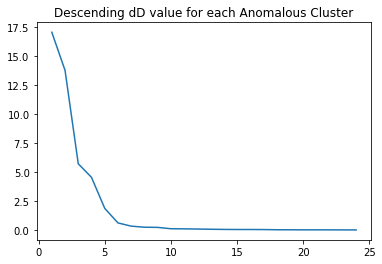

In [ ]:
dD_list.sort(reverse=True)

plt.plot(np.arange(1, 25, 1), dD_list)
plt.title(label = 'Descending dD value for each Anomalous Cluster')
plt.savefig('dD_list_values_for_c.png', dpi=300)

c) Take the Anomalous Clustering as the initialization algorithm to the fuzzy c-means and apply the
Anomalous Patterns_FCM to your data set. Discuss the option taken for setting its stop condition. Present
and visualize the found fuzzy partitions of AP-FCM taking advantage of the PCA visualization (check PCA
tutorial).

d) Discuss the results obtained by Anomalous Patterns FCM for your data case respecting the following: (i)
location of the initial prototypes; (ii) number of clusters.

e) Apply, at least, two validation indices, like the Adjust Rand Index (ARI) and Xie-Beni, to access the quality
of the fuzzy c-partitions obtained in a). Compare these results with the one of Anomalous Patterns FCM
getting in c).

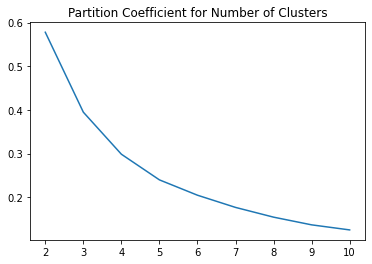

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

number_clusters = np.arange(2, 11, 1)

#ver codigo R
#prediction coeficient
pc = [0.5778, 0.3949, 0.2987, 0.2400, 0.2049, 0.1770, 0.1547, 0.1371, 0.1255]


plt.plot(number_clusters, pc)
plt.title(label = 'Partition Coefficient for Number of Clusters')
plt.savefig('pc_for_c.png', dpi=300)

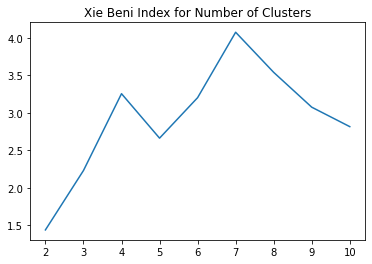

In [ ]:
#Xie-beni index
xb = [1.4375, 2.2295, 3.2544, 2.6613, 3.2014, 4.0739, 3.5388, 3.0744, 2.8149]

plt.plot(number_clusters, xb)
plt.title(label = 'Xie Beni Index for Number of Clusters')
plt.savefig('xb_for_c.png', dpi=300)

f) Make interpretation of the found clusters (after defuzzification) for your data, as discussed in the classes.
